## NVIDA Stock Trend Analysis

Author - Martin Jimenez

### Background About NVIDIA 
NVIDIA Corporation, founded in 1993 by Jensen Huang, Chris Malachowsky, and Curtis Priem, is a leading technology company known for its innovations in graphics processing units (GPUs). Initially focused on the gaming industry, NVIDIA's GPUs have become critical components in a wide range of applications, including:

### Motivation 
- Gaming: NVIDIA's GeForce brand is synonymous with high-performance gaming graphics cards.
- Professional Visualization: NVIDIA's Quadro series caters to professionals in design, architecture, and content creation.
- Data Centers: NVIDIA's Tesla and A100 GPUs are widely used in data centers for high-performance computing (HPC) and AI workloads.
- Automotive: NVIDIA's DRIVE platform powers autonomous vehicle technology.
- Artificial Intelligence (AI): NVIDIA GPUs are at the forefront of AI research and development, providing the computational power needed for deep learning models.

#### Current News About NVIDIA (as of May 2024)
To get the latest news on NVIDIA, you can use Python to fetch recent articles. Below is a Python script that uses the NewsAPI to retrieve the latest news about NVIDIA.

In [2]:
import requests
import pandas as pd

# Your API key
api_key = 'api goes here'
url = f'https://newsapi.org/v2/everything?q=NVIDIA&apiKey={api_key}'

# Fetch the news data
response = requests.get(url)
news_data = response.json()

# Check if the request was successful
if news_data['status'] == 'ok':
    articles = news_data['articles']
    
    # Create a DataFrame to store the news articles
    df = pd.DataFrame(articles)
    
    # Extract the source name
    df['source'] = df['source'].apply(lambda x: x['name'] if isinstance(x, dict) else None)
    
    # Select relevant columns
    df = df[['source', 'author', 'title', 'description', 'url', 'publishedAt']]
    
    # Display the latest news
    print(df.head())
else:
    print('Failed to retrieve news data')


             source                                  author  \
0         ReadWrite                            Graeme Hanna   
1         ReadWrite                            Suswati Basu   
2  Business Insider                  Ana Altchek,Jyoti Mann   
3  Business Insider  madams@businessinsider.com (Max Adams)   
4  Business Insider                             Ana Altchek   

                                               title  \
0  Nvidia confirms worldwide acceleration in quan...   
1  Dell and Nvidia partner up to create ‘AI facto...   
2  The Magnificent 7 companies are worth a combin...   
3  Stock market today: Indexes pop after Nvidia's...   
4       Nvidia just keeps hitting it out of the park   

                                         description  \
0  Nvidia has confirmed it will accelerate quantu...   
1  Dell has announced an expansion of its partner...   
2  Microsoft, Apple, Nvidia, Alphabet, Amazon, Me...   
3  Nvidia cleared a high bar, impressing investor...   
4  N

## NVIDIA Ticker

### Data Collection
using the 'yfinance' to fetch NVIDIA stock price data

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download NVIDIA stock data
nvidia = yf.Ticker('NVDA')
data = nvidia.history(period='5y')

# Display the first few rows of the data
print(data.head())


                                Open       High        Low      Close  \
Date                                                                    
2019-05-28 00:00:00-04:00  36.217358  36.545114  35.569289  35.589153   
2019-05-29 00:00:00-04:00  35.112403  35.462510  34.499096  34.846718   
2019-05-30 00:00:00-04:00  34.879040  35.237004  34.197918  34.580738   
2019-05-31 00:00:00-04:00  34.091023  34.764691  33.655998  33.673401   
2019-06-03 00:00:00-04:00  33.785260  34.173053  32.962443  33.255772   

                             Volume  Dividends  Stock Splits  
Date                                                          
2019-05-28 00:00:00-04:00  42835600       0.00           0.0  
2019-05-29 00:00:00-04:00  55980000       0.00           0.0  
2019-05-30 00:00:00-04:00  39430000       0.04           0.0  
2019-05-31 00:00:00-04:00  38972000       0.00           0.0  
2019-06-03 00:00:00-04:00  47864400       0.00           0.0  


In [4]:
# Calculate moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# Display the updated data
print(data[['Close', 'MA50', 'MA200']].tail())


                                 Close        MA50       MA200
Date                                                          
2024-05-20 00:00:00-04:00   947.799988  883.868198  614.248914
2024-05-21 00:00:00-04:00   953.859985  885.790598  616.784699
2024-05-22 00:00:00-04:00   949.500000  886.397998  619.261842
2024-05-23 00:00:00-04:00  1037.989990  888.980198  622.219077
2024-05-24 00:00:00-04:00  1064.689941  892.685197  625.415288


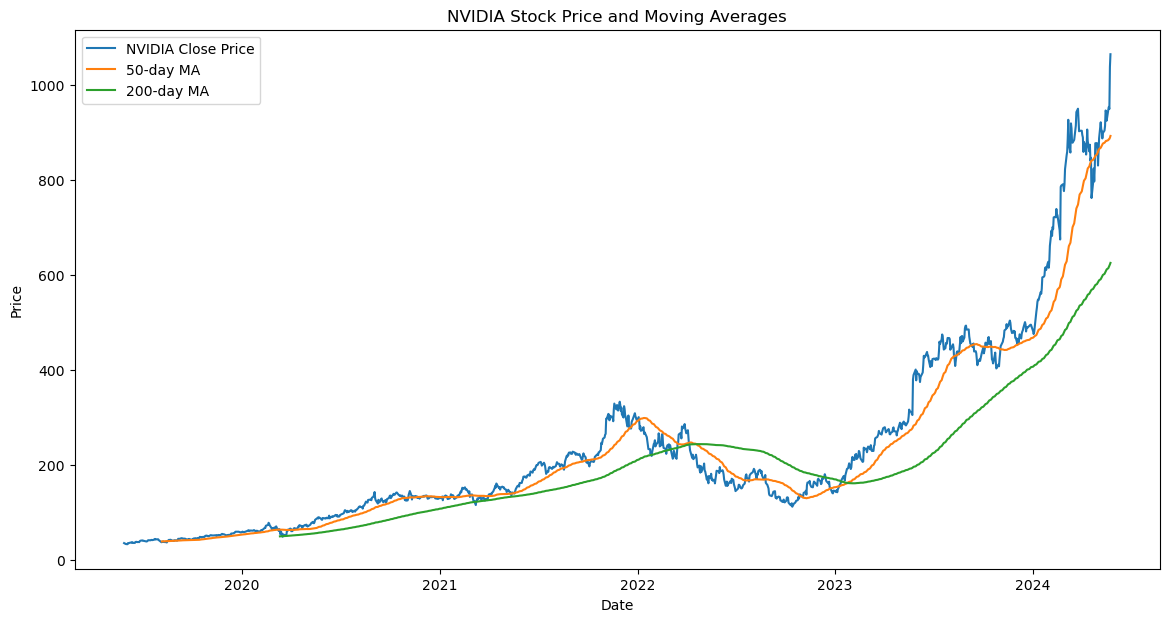

In [5]:
# Plot stock price and moving averages
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='NVIDIA Close Price')
plt.plot(data['MA50'], label='50-day MA')
plt.plot(data['MA200'], label='200-day MA')
plt.title('NVIDIA Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
